In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
plt.set_cmap('jet')

In [2]:
# data_dir = '/data/cees/zjin/lstm_rom/datasets/9W_BHP/'
# data_dir = '/data/cees/zjin/lstm_rom/datasets/9W_BHP_RATE/'
# data_dir = '/data/cees/zjin/lstm_rom/datasets/9W_MS_BHP_RATE/'
# data_dir = '/data3/Astro/personal/zjin/datasets/9W_MS_BHP_RATE_GAU/'
data_dir = '/data3/Astro/personal/zjin/datasets/7W_CHA/'

# case_name = '9w_bhp'
# case_name = '9w_bhp_rate'
# case_name = '9w_ms_bhp_rate'
case_name = '7w_cha'

state_file = case_name + '_train_n_400_full'
ctrl_file = case_name + '_norm_bhps_n_400'

# case_suffix = '_single_out_rel_3'
# case_suffix = '_single_out_rel_2'
# case_suffix = '_single_out_rel_1'
case_suffix = '_fix_wl_rel_1'
# case_suffix = '_fix_wl_rel_8'
train_suffix = '_with_p'

state_data = state_file + case_suffix + '.mat'
ctrl_data = ctrl_file + case_suffix + '.mat'

In [3]:
hf_r = h5py.File(data_dir + ctrl_data)
bhp0 = np.array(hf_r.get('bhp'))
rate0 = np.array(hf_r.get('rate'))
hf_r.close()

In [4]:
bhp = np.concatenate((bhp0,rate0),axis=1)
print(bhp.shape)

(400, 140)


In [5]:
dt = 10 # time step increment, not used now
t_interval = 10

indt = np.array(range(0,200,t_interval))
indt1 = indt + t_interval
print(indt)
print(indt1)

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190]
[ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180
 190 200]


In [6]:
# with 2 bhps per period
nt_ctrl = 20 # assume to be equally spaced
num_step = len(indt)
num_case = bhp.shape[0]
num_prod = 4 # 5, for gaussian
num_inj = 3 # 4, for gaussian
num_well = num_inj + num_prod

tmp = np.array(range(num_step)) - 1
tmp1 = np.array(range(num_step))
tmp[0] = 0

print(tmp)
print(tmp1)
print(bhp.shape)

[ 0  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
(400, 140)


In [7]:
bhp_b0 = bhp.reshape(num_case, num_well, nt_ctrl)
bhp_b1 = np.repeat(bhp_b0[..., np.newaxis], num_step // nt_ctrl, axis=3)
assert num_step // nt_ctrl * nt_ctrl == num_step, "no exaxt division num_step = %d, num_ctrl=%d"%(num_step, num_ctrl)

print(bhp_b1.shape)
bhp_b2 = bhp_b1.reshape(num_case, num_well, num_step)
print(bhp_b2.shape)

(400, 7, 20, 1)
(400, 7, 20)


In [8]:
bhp_tt = bhp_b2[:,:, tmp]
bhp_tt1 = bhp_b2[:,:, tmp1]
print(bhp_tt.shape)
print(bhp_tt1.shape)

bhp_tt0 = np.concatenate((bhp_tt, bhp_tt1), axis=1)
bhp_t = np.swapaxes(bhp_tt0,1,2)
print(bhp_t.shape)
print(bhp.shape)
print(bhp[0,:20]) # these two should be same
print(bhp_t[0,:,9]) # these two should be same
print(bhp_t[0,:,0])

(400, 7, 20)
(400, 7, 20)
(400, 20, 14)
(400, 140)
[0.13563532 0.11714268 0.11925315 0.12525658 0.12789043 0.13145832
 0.11946358 0.13208731 0.129524   0.13480344 0.13965102 0.12298142
 0.1249027  0.14177363 0.12736432 0.13044347 0.14159801 0.13043148
 0.1308215  0.1423218 ]
[0.13712794 0.12825785 0.13576085 0.1173268  0.11489406 0.13690317
 0.11587831 0.13754447 0.13141211 0.12030358 0.13660337 0.12031934
 0.13653711 0.11652366 0.13371429 0.13158443 0.13278957 0.11857339
 0.13304365 0.11635248]
[0.13563532 0.13563532 0.11714268 0.11925315 0.12525658 0.12789043
 0.13145832 0.11946358 0.13208731 0.129524   0.13480344 0.13965102
 0.12298142 0.1249027  0.14177363 0.12736432 0.13044347 0.14159801
 0.13043148 0.1308215 ]


In [9]:
# print(bhp.shape)
# bhp_a = bhp.reshape(400, 9, nt_ctrl)
# bhp_tt = bhp_a[:,:, tmp]
# bhp_tt1 = bhp_a[:,:, tmp1]
# print(bhp_tt.shape)
# print(bhp_tt1.shape)
# bhp_tt0 = np.concatenate((bhp_tt, bhp_tt1), axis=1)
# bhp_t = np.swapaxes(bhp_tt0,1,2)
# print(bhp_t.shape)
# print(bhp[0,:20])
# print(bhp_t[0,:,9])

In [10]:
# print(bhp.shape)
# bhp_a = bhp.reshape(400, 9, nt_ctrl)
# bhp_tt = bhp_a[:,:, tmp]
# bhp_tt1 = bhp_a[:,:, tmp1]
# print(bhp_tt.shape)
# print(bhp_tt1.shape)
# bhp_tt0 = np.concatenate((bhp_tt, bhp_tt1), axis=1)
# bhp_t = np.swapaxes(bhp_tt0,1,2)
# print(bhp_t.shape)
# print(bhp[0,:20])
# print(bhp_t[0,:,9])

In [9]:
bhp_a1 = np.concatenate((bhp_tt1, bhp_tt1), axis=1)
bhp_a2 = np.swapaxes(bhp_a1,1,2)
# bhp_a30 = bhp_a2.reshape(400, 20, 2, 9)
bhp_a30 = bhp_a2.reshape(400, 20, 2, 7)
print(bhp_a30[0,:,:,0])
# bhp_a30 = bhp_a2.reshape(400, 20, 2, 9)
bhp_a30 = bhp_a2.reshape(400, 20, 2, 7)
print(bhp_a30[0,:,0])

[[0.13563532 0.13563532]
 [0.11714268 0.11714268]
 [0.11925315 0.11925315]
 [0.12525658 0.12525658]
 [0.12789043 0.12789043]
 [0.13145832 0.13145832]
 [0.11946358 0.11946358]
 [0.13208731 0.13208731]
 [0.129524   0.129524  ]
 [0.13480344 0.13480344]
 [0.13965102 0.13965102]
 [0.12298142 0.12298142]
 [0.1249027  0.1249027 ]
 [0.14177363 0.14177363]
 [0.12736432 0.12736432]
 [0.13044347 0.13044347]
 [0.14159801 0.14159801]
 [0.13043148 0.13043148]
 [0.1308215  0.1308215 ]
 [0.1423218  0.1423218 ]]
[[0.13563532 0.12849744 0.13712794 0.13533259 0.55995688 0.62242419
  0.38098373]
 [0.11714268 0.13174445 0.12825785 0.13561973 0.55054956 0.71801943
  0.32281359]
 [0.11925315 0.12397558 0.13576085 0.12807141 0.59404259 0.71550559
  0.4181129 ]
 [0.12525658 0.13554156 0.1173268  0.1235805  0.61449694 0.65665697
  0.40405336]
 [0.12789043 0.13415669 0.11489406 0.13680378 0.57595666 0.70831976
  0.48042038]
 [0.13145832 0.14137662 0.13690317 0.13322487 0.59765169 0.63806982
  0.50723531]
 [0.119

In [10]:
tt = np.array([indt, indt1]).reshape(2,20)
tt_ctrl = tt.T.flatten()*10
print(tt_ctrl)

[   0  100  100  200  200  300  300  400  400  500  500  600  600  700
  700  800  800  900  900 1000 1000 1100 1100 1200 1200 1300 1300 1400
 1400 1500 1500 1600 1600 1700 1700 1800 1800 1900 1900 2000]


In [11]:
print(bhp_a30.shape)
print(tt_ctrl.shape)

(400, 20, 2, 7)
(40,)


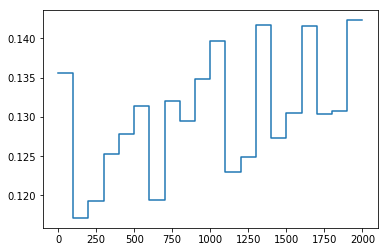

In [12]:
plt.figure()
plt.plot(tt_ctrl, bhp_a30[0,:,:,0].flatten())

In [30]:
# ind_case = np.array(range(75, 475, 100)) + 10
ind_case = np.array([10, 15, 17, 74])
print(ind_case)
num_case = len(ind_case)
num_inj = 3
num_prod = 4
num_well = num_inj + num_prod

[10 15 17 74]


In [14]:
p_max = 425*14.5038
p_min = 250*14.5038
p_diff = p_max - p_min

q_max = 6500
q_min = 1500
q_diff = q_max - q_min

In [15]:
bhp000 = bhp_a30[:,:,:,:num_prod] * p_diff + p_min
    
q000 = bhp_a30[:,:,:,num_prod:] * q_diff + q_min

bbl2m3 = 6.2898 * 1000

In [16]:
print(q000.shape)

(400, 20, 2, 3)


In [22]:
print(tt_ctrl.shape)
print(q000[ind_case[i_case],:,:,i_well].flatten().shape)

(40,)
(40,)


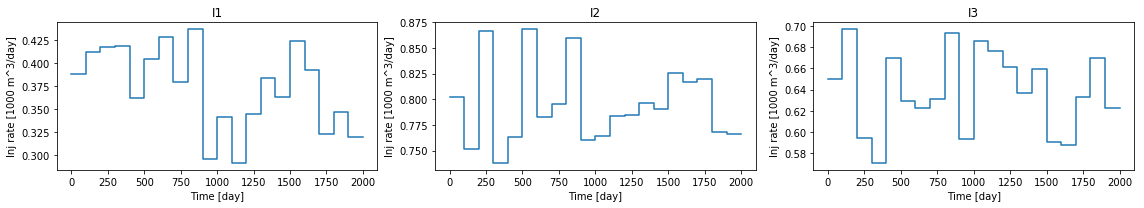

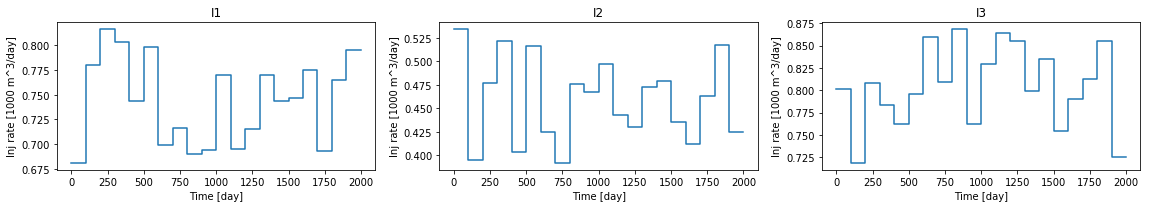

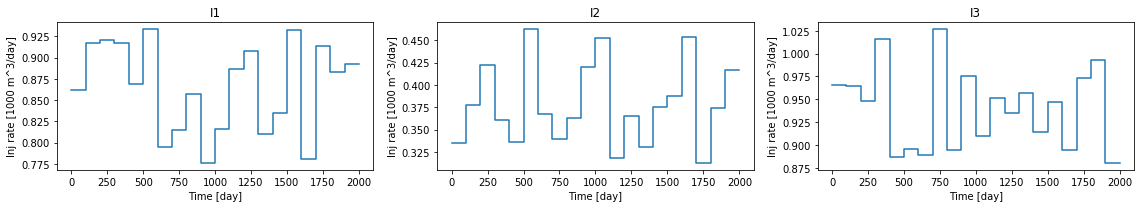

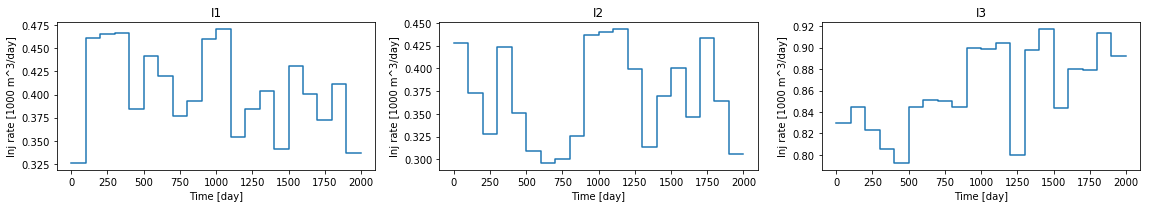

In [23]:
for i_case in range(num_case):
    plt.figure(figsize=(16,3))
    for i_well in range(num_inj):
        plt.subplot(1,num_inj, i_well+1)
        plt.plot(tt_ctrl, q000[ind_case[i_case],:,:,i_well].flatten()/bbl2m3)
        plt.title("I%d"%(i_well+1))
        plt.ylabel("Inj rate [1000 m^3/day]")
        plt.xlabel('Time [day]')
    plt.tight_layout()

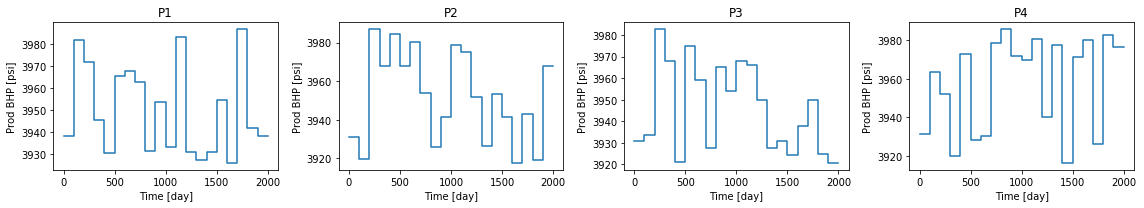

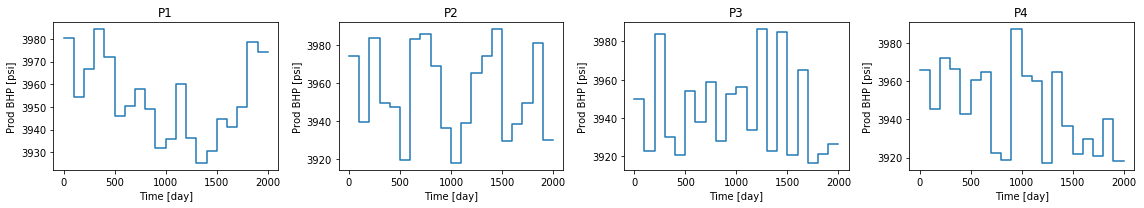

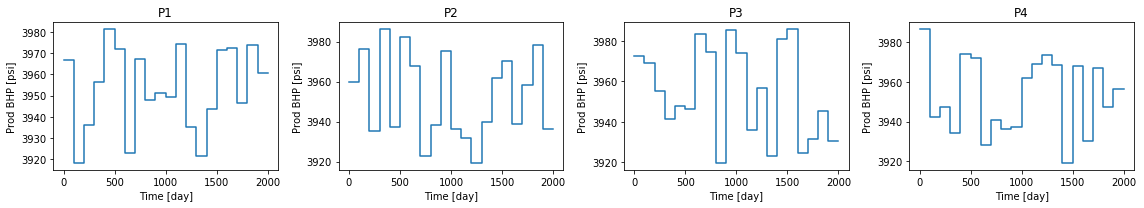

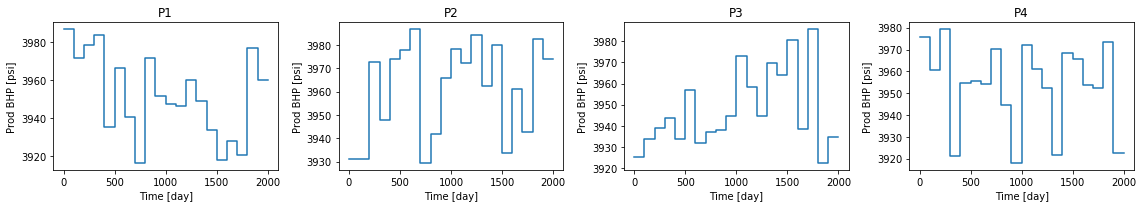

In [24]:
for i_case in range(num_case):
    plt.figure(figsize=(16,3))
    for i_well in range(num_prod):
        plt.subplot(1,num_prod, i_well+1)
        plt.plot(tt_ctrl, bhp000[ind_case[i_case],:,:,i_well].flatten())
        plt.title("P%d"%(i_well+1))
        plt.ylabel("Prod BHP [psi]")
        plt.xlabel('Time [day]')
    plt.tight_layout()

In [19]:
# for i_case in range(num_case):
#     plt.figure(figsize=(16,3))
#     for i_well in range(num_inj):
#         plt.subplot(1,num_inj, i_well+1)
#         plt.plot(tt_ctrl, bhp000[ind_case[i_case],:,i_well])
#         plt.title("P%d"%(i_well+1))
#         plt.ylabel("Prod BHP [psi]")
#         plt.xlabel('Time [day]')
#     plt.tight_layout()

In [26]:
plt.rcParams.update({'font.size': 22})

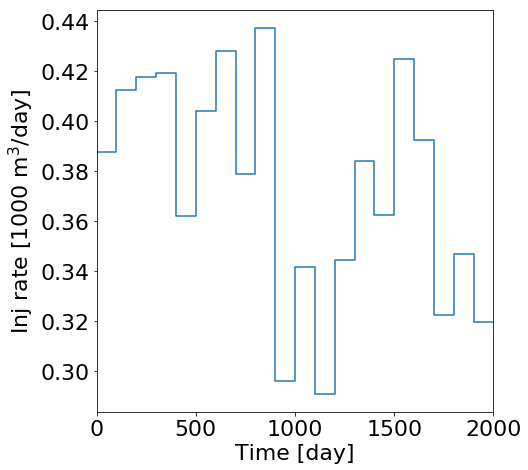

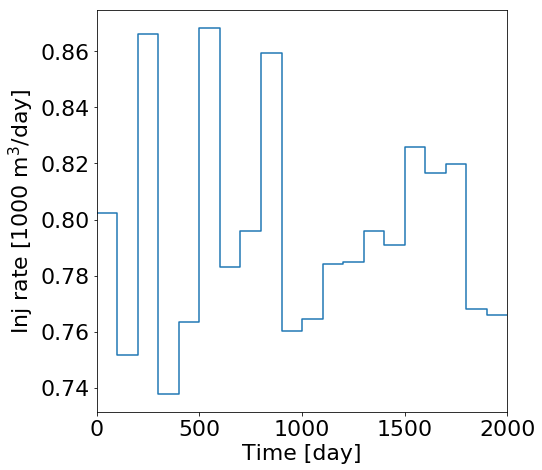

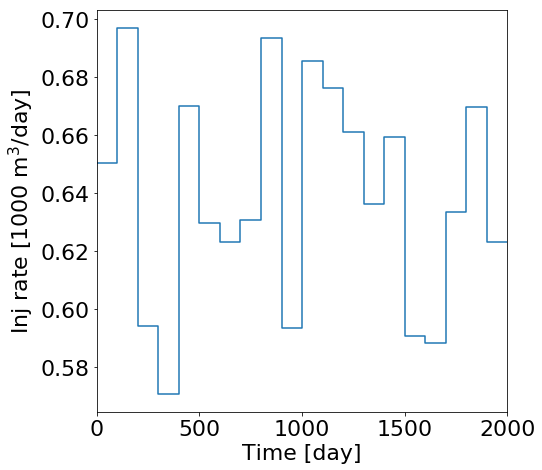

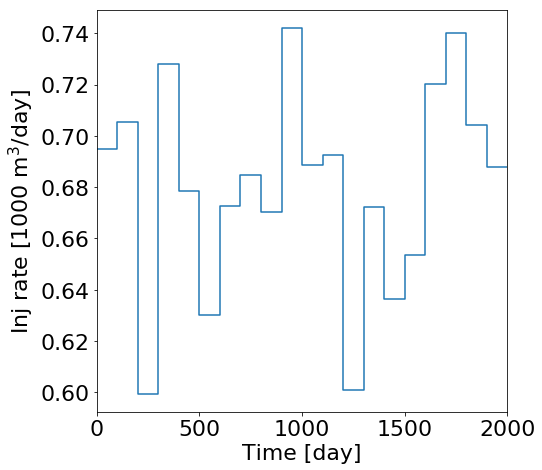

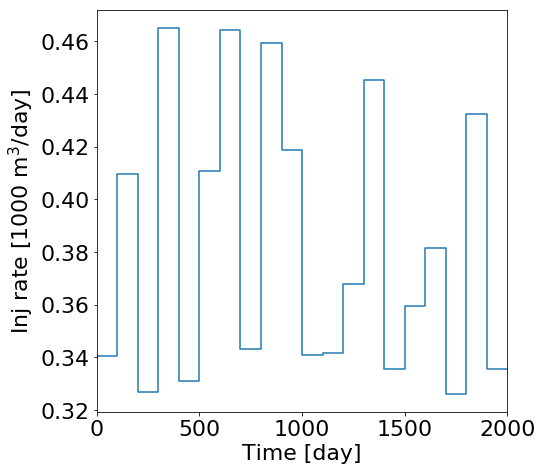

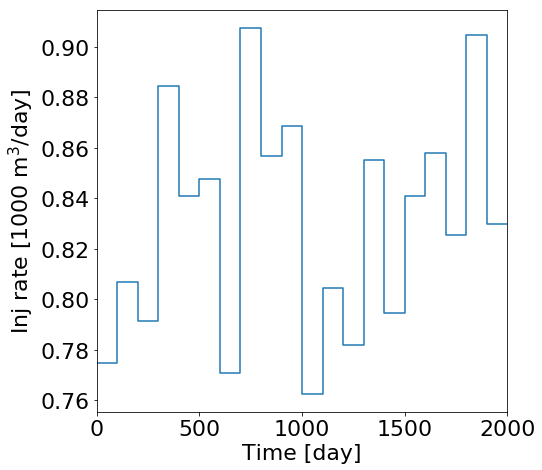

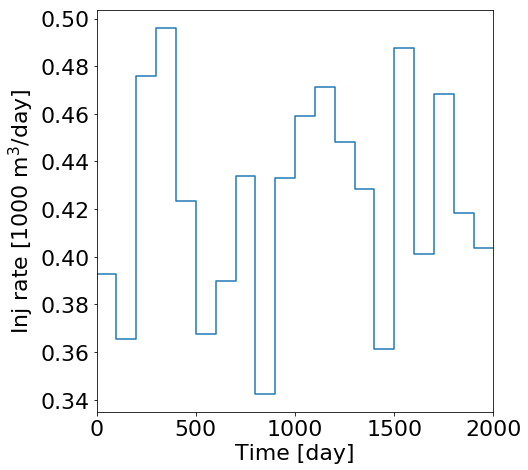

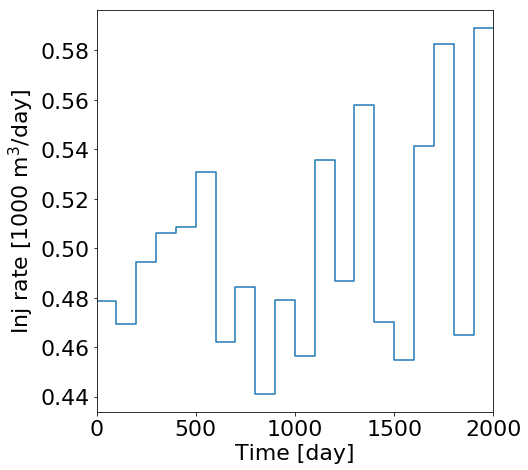

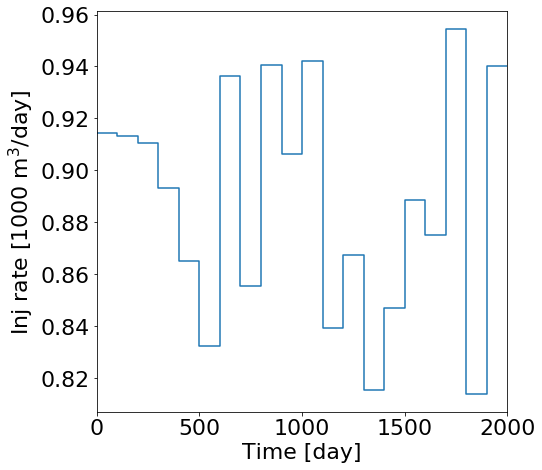

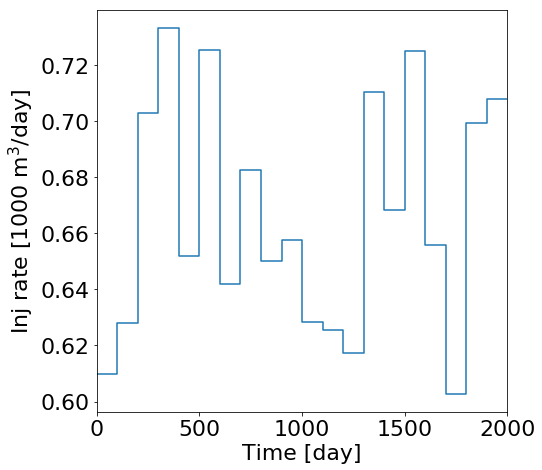

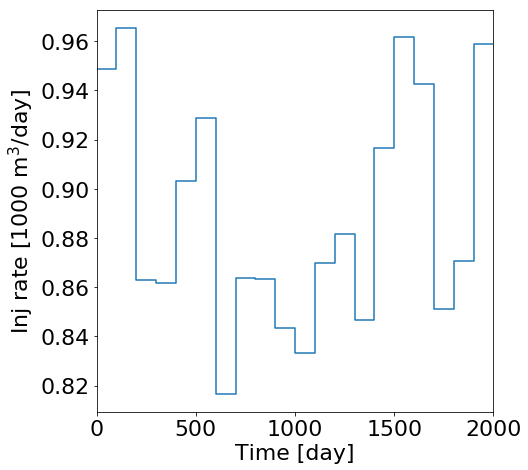

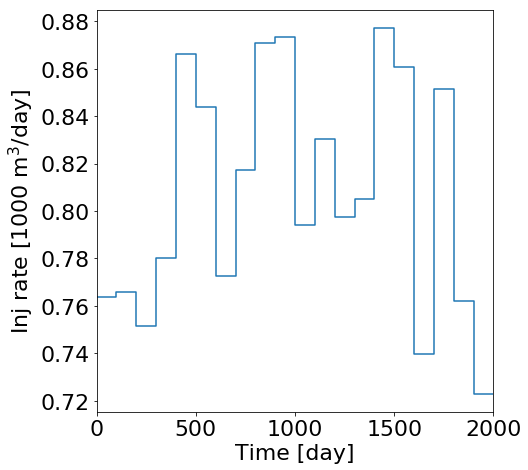

In [31]:
for k in range(num_case):
    
    for i_well in range(num_inj):
        plt.figure(figsize=(8,7))
#         plt.subplot(1,num_inj, i_well+1)
        plt.plot(tt_ctrl, q000[ind_case[k],:,:,i_well].flatten()/bbl2m3)
#         plt.title("I%d"%(i_well+1))
        plt.ylabel(r"Inj rate [1000 m$^{3}$/day]")
        plt.xlabel('Time [day]')
        plt.xlim((0, 2000))
        plt.tight_layout()
        plt.savefig('figs/'+ 'ctrl_inj_rate_%d_I%d_'%(ind_case[k], i_well+1) + case_name + case_suffix + '.eps', dpi=None, facecolor='w', edgecolor='w',
                orientation='landscape', format='eps', pad_inches=0.1)
        plt.savefig('figs/'+ 'ctrl_inj_rate_%d_I%d_'%(ind_case[k], i_well+1) + case_name + case_suffix + '.pdf', dpi=None, facecolor='w', edgecolor='w',
                orientation='landscape', format='pdf', pad_inches=0.1)

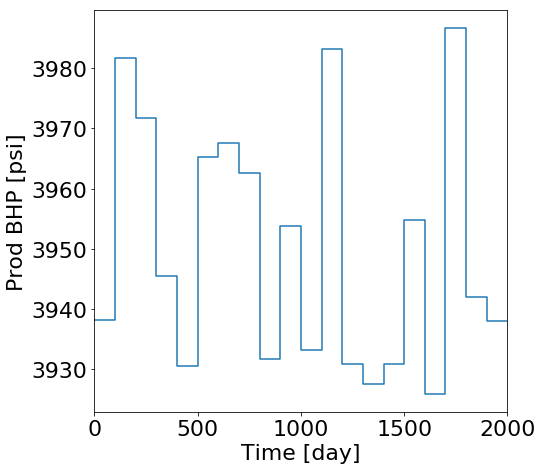

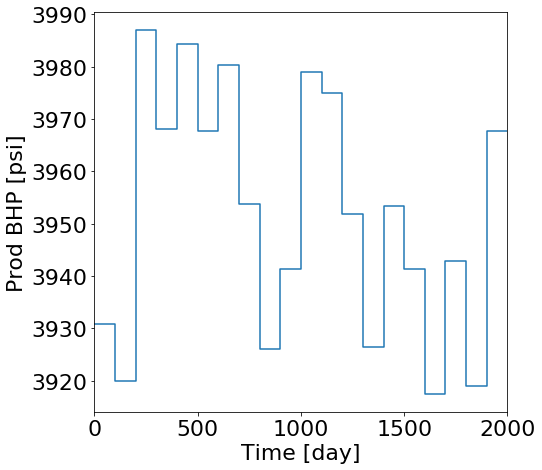

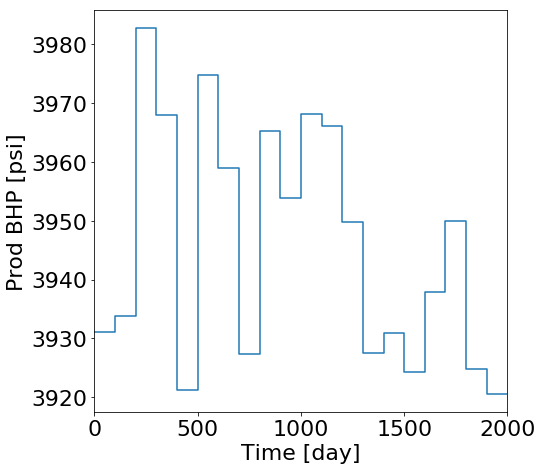

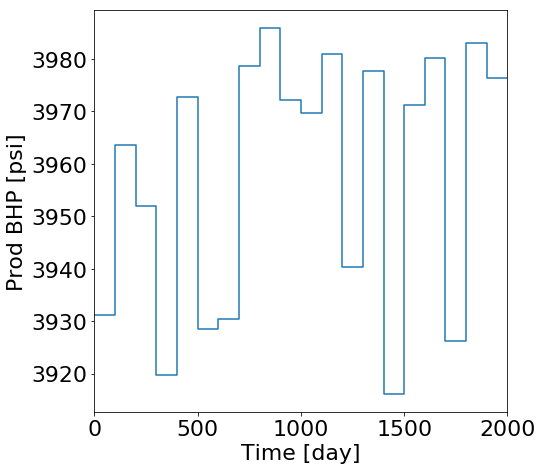

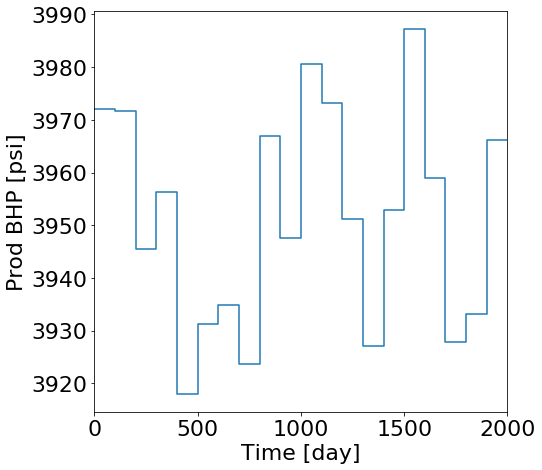

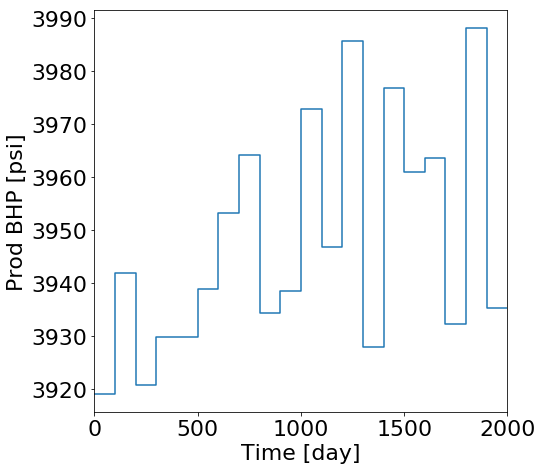

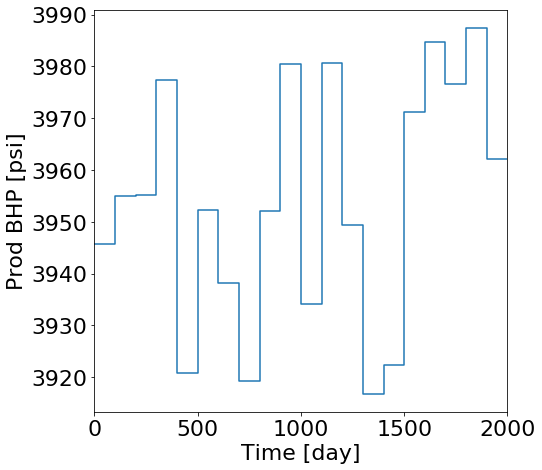

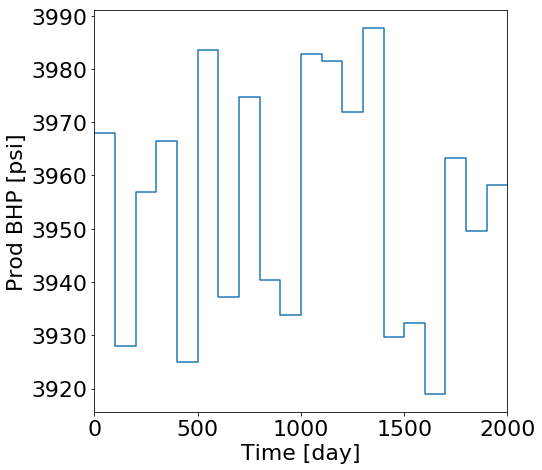

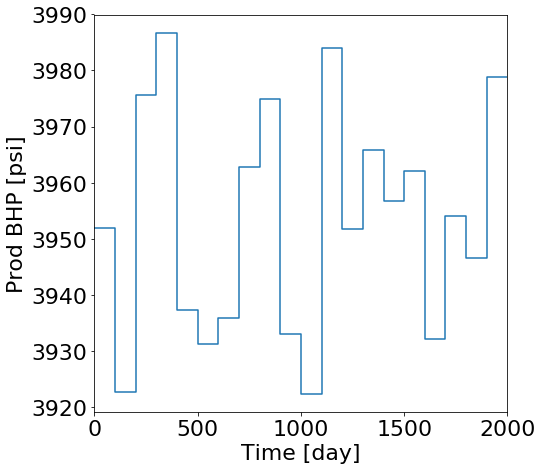

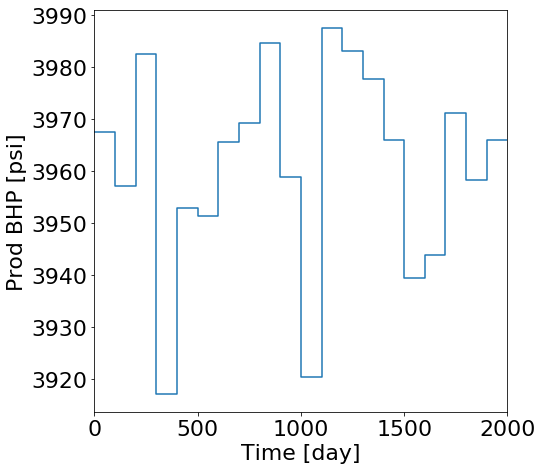

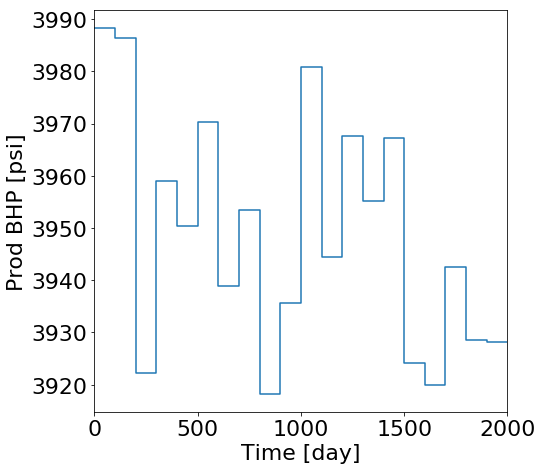

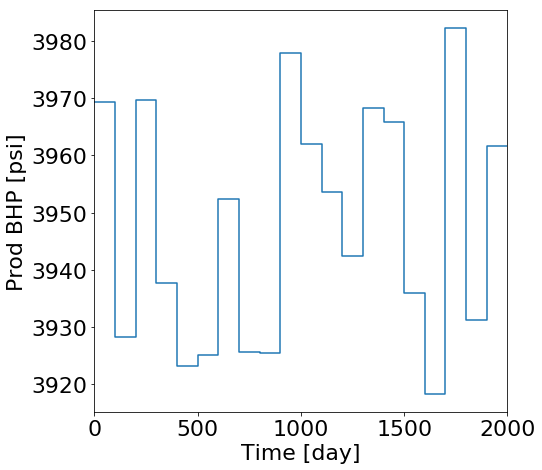

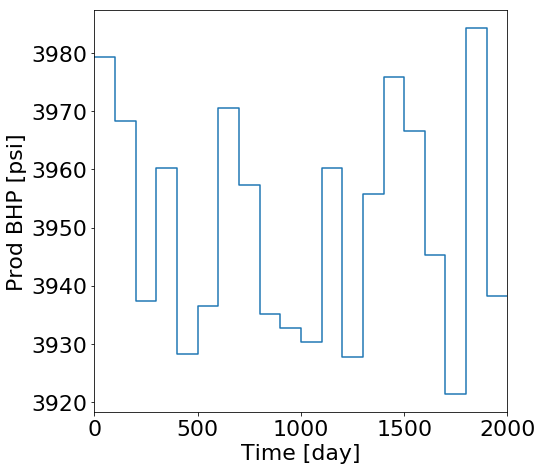

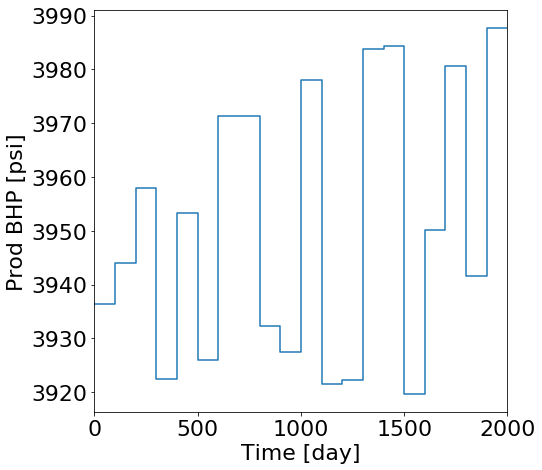

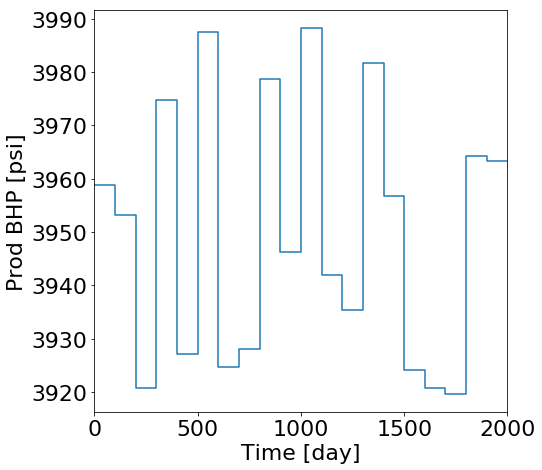

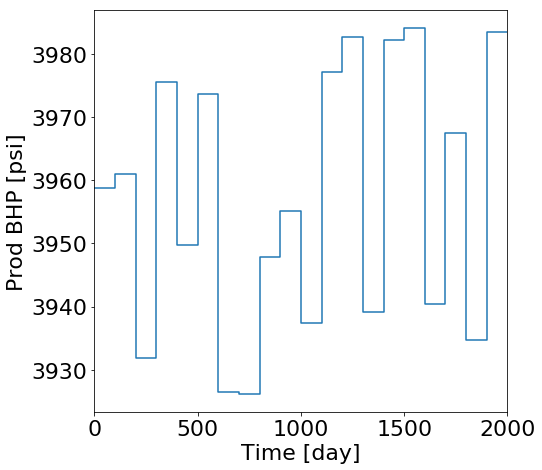

In [32]:
for k in range(num_case):
    
    for i_well in range(num_prod):
        plt.figure(figsize=(8,7))
#         plt.subplot(1,num_prod, i_well+1)
        plt.plot(tt_ctrl, bhp000[ind_case[k],:,:,i_well].flatten())
#         plt.title("P%d"%(i_well+1))
        plt.ylabel("Prod BHP [psi]")
        plt.xlabel('Time [day]')
        plt.xlim((0, 2000))
        plt.tight_layout()
        plt.savefig('figs/'+ 'ctrl_prod_bhp_%d_P%d_'%(ind_case[k], i_well+1) + case_name + case_suffix + '.eps', dpi=None, facecolor='w', edgecolor='w',
                orientation='landscape', format='eps', pad_inches=0.1)
        plt.savefig('figs/'+ 'ctrl_prod_bhp_%d_P%d_'%(ind_case[k], i_well+1) + case_name + case_suffix + '.pdf', dpi=None, facecolor='w', edgecolor='w',
                orientation='landscape', format='pdf', pad_inches=0.1)